Found 681 images belonging to 2 classes.
Found 169 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.7265 - loss: 0.6998 - val_accuracy: 0.8107 - val_loss: 0.4984
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 666ms/step - accuracy: 0.7931 - loss: 0.5260 - val_accuracy: 0.8107 - val_loss: 0.5471
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8096 - loss: 0.4969 - val_accuracy: 0.8107 - val_loss: 0.4857
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 657ms/step - accuracy: 0.8097 - loss: 0.4722 - val_accuracy: 0.8107 - val_loss: 0.5243
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 666ms/step - accuracy: 0.8315 - loss: 0.4686 - val_accuracy: 0.8107 - val_loss: 0.5116
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 649ms/step - accuracy: 0.8061 - loss: 0.4862 - val_accuracy: 0.8107 - val_loss: 0.4836
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 645ms/step - accuracy: 0.8230 - loss: 0.4810 - val_accuracy: 0.8107 - val_loss: 0.4887
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 637ms/step - accuracy: 0.8156 - loss: 0.4859 - val_accuracy:

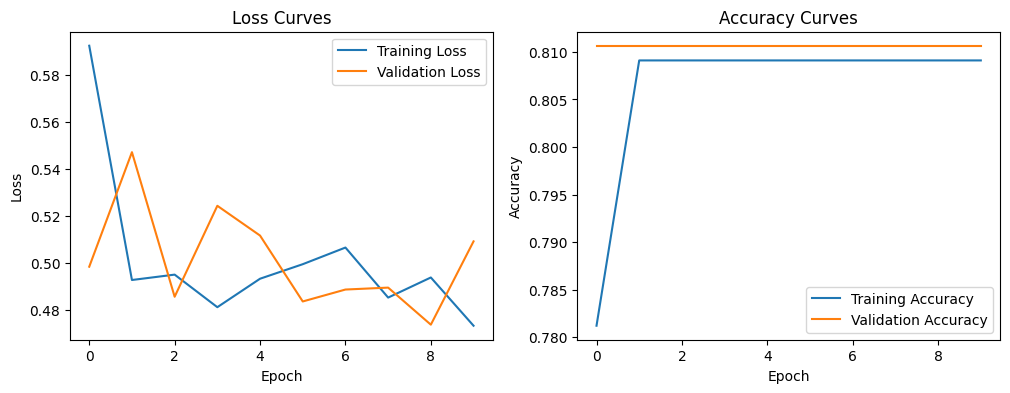

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


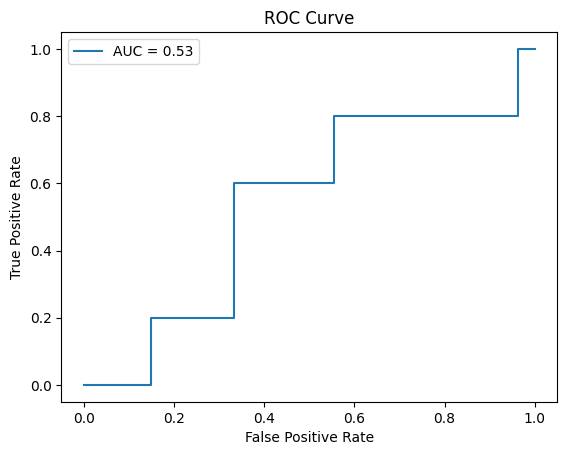

Confusion Matrix:
 [[27  0]
 [ 5  0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.92        27
         1.0       0.00      0.00      0.00         5

    accuracy                           0.84        32
   macro avg       0.42      0.50      0.46        32
weighted avg       0.71      0.84      0.77        32

Z-test: Z-stat = 8.6090, p-value = 0.0000
T-test: t-stat = -1.5543, p-value = 0.1545


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

ANOVA: F-stat = nan, p-value = nan


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 988ms/step - accuracy: 0.9067 - loss: 0.4583
Test Accuracy: 0.8600
Test Z-test: Z-stat = 16.0997, p-value = 0.0000


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from scipy import stats
import os


IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
BASELINE_ACC = 0.5


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (3)/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (3)/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (3)/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

val_images, val_labels = next(validation_generator)
val_preds = model.predict(val_images)
val_preds_binary = (val_preds > 0.5).astype(int)
fpr, tpr, _ = roc_curve(val_labels, val_preds)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cm = confusion_matrix(val_labels, val_preds_binary)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(val_labels, val_preds_binary))

val_acc = history.history['val_accuracy'][-1]
n_val = len(validation_generator) * BATCH_SIZE
z_stat = (val_acc - BASELINE_ACC) / np.sqrt(BASELINE_ACC * (1 - BASELINE_ACC) / n_val)
p_value_z = 2 * (1 - stats.norm.cdf(abs(z_stat)))
print(f"Z-test: Z-stat = {z_stat:.4f}, p-value = {p_value_z:.4f}")

train_accs = history.history['accuracy']
val_accs = history.history['val_accuracy']
t_stat, p_value_t = stats.ttest_rel(train_accs, val_accs)
print(f"T-test: t-stat = {t_stat:.4f}, p-value = {p_value_t:.4f}")

acc_runs = []
for _ in range(3):
    model_run = create_model()
    history_run = model_run.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator, verbose=0)
    acc_runs.append(history_run.history['val_accuracy'][-1])

f_stat, p_value_anova = stats.f_oneway(*[np.array([acc] * EPOCHS) for acc in acc_runs])
print(f"ANOVA: F-stat = {f_stat:.4f}, p-value = {p_value_anova:.4f}")

model.save('fashion_cnn_model.h5')
loaded_model = tf.keras.models.load_model('fashion_cnn_model.h5')

test_loss, test_acc = loaded_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

n_test = 500
z_stat_test = (test_acc - BASELINE_ACC) / np.sqrt(BASELINE_ACC * (1 - BASELINE_ACC) / n_test)
p_value_test = 2 * (1 - stats.norm.cdf(abs(z_stat_test)))
print(f"Test Z-test: Z-stat = {z_stat_test:.4f}, p-value = {p_value_test:.4f}")